In [1]:
import torch
from torch import nn, optim

from src.data.helicopter import get_helicopter_dataloaders
from src.models.transformer import CustomTransformer
from src.training.helicopter import train_helicopter

train_data, valid_data = get_helicopter_dataloaders(batch_size=24, shuffle=True, device="cuda")

model = CustomTransformer(max_seq_len=512, d_model=512).to("cuda")

optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

train_helicopter(train_data, valid_data, model, optimizer, scheduler, mask_prop=0.3, epochs=20, device="cuda")


c:\Users\maxho\anaconda3\envs\transformer-anomaly-detection\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1:


Validating ...: 100%|██████████| 2970/2970 [04:45<00:00, 10.41it/s]


Epoch 1/20, Train loss: 0.0034499026369303465, Valid loss: 0.0024608843959867954
Epoch 2:


Training ...:   2%|▏         | 151/8385 [00:43<39:44,  3.45it/s]


KeyboardInterrupt: 

In [2]:
torch.save(model, "model-first-good.save")

In [3]:
# import torch
# from torch import nn
# from src.data.helicopter import get_helicopter_dataloaders
# from src.models.transformer import CustomTransformer
from src.plotting import plot_attention_weights

# train_data, valid_data = get_helicopter_dataloaders(batch_size=24, shuffle=True, device="cuda")


for batch in train_data:
    break

mask = (torch.FloatTensor(batch.shape).uniform_() > 0.3).to("cuda")

# model = torch.load("model.save")
# model = CustomTransformer(max_seq_len=512, d_model=512).to("cuda")

pred_batch, layer_attn_weights = model(batch*mask)

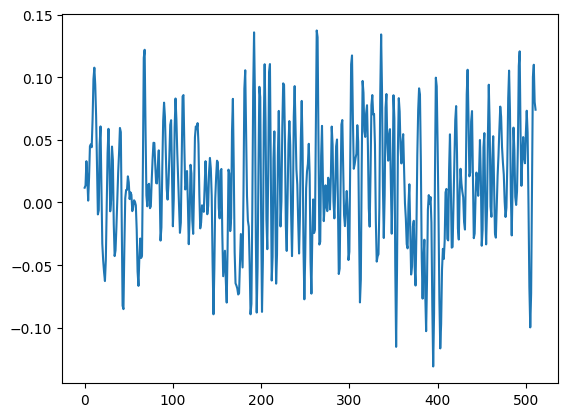

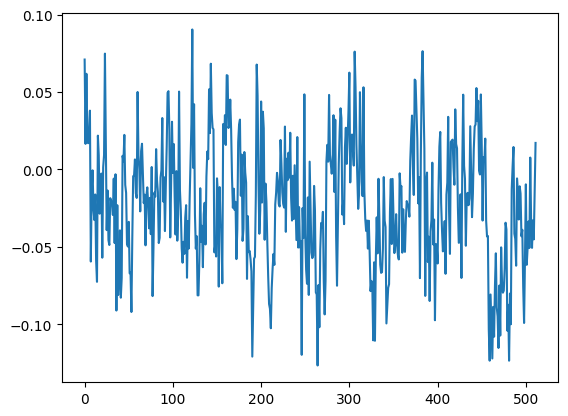

In [4]:
import matplotlib.pyplot as plt

idx = 1

plt.plot((batch).cpu().detach()[idx])
plt.show()
plt.plot((pred_batch).cpu().detach()[idx])
plt.show()

c:\Users\maxho\Documents\tue\research-topics-in-data-mining\transformer-anomaly-detection\src\plotting.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


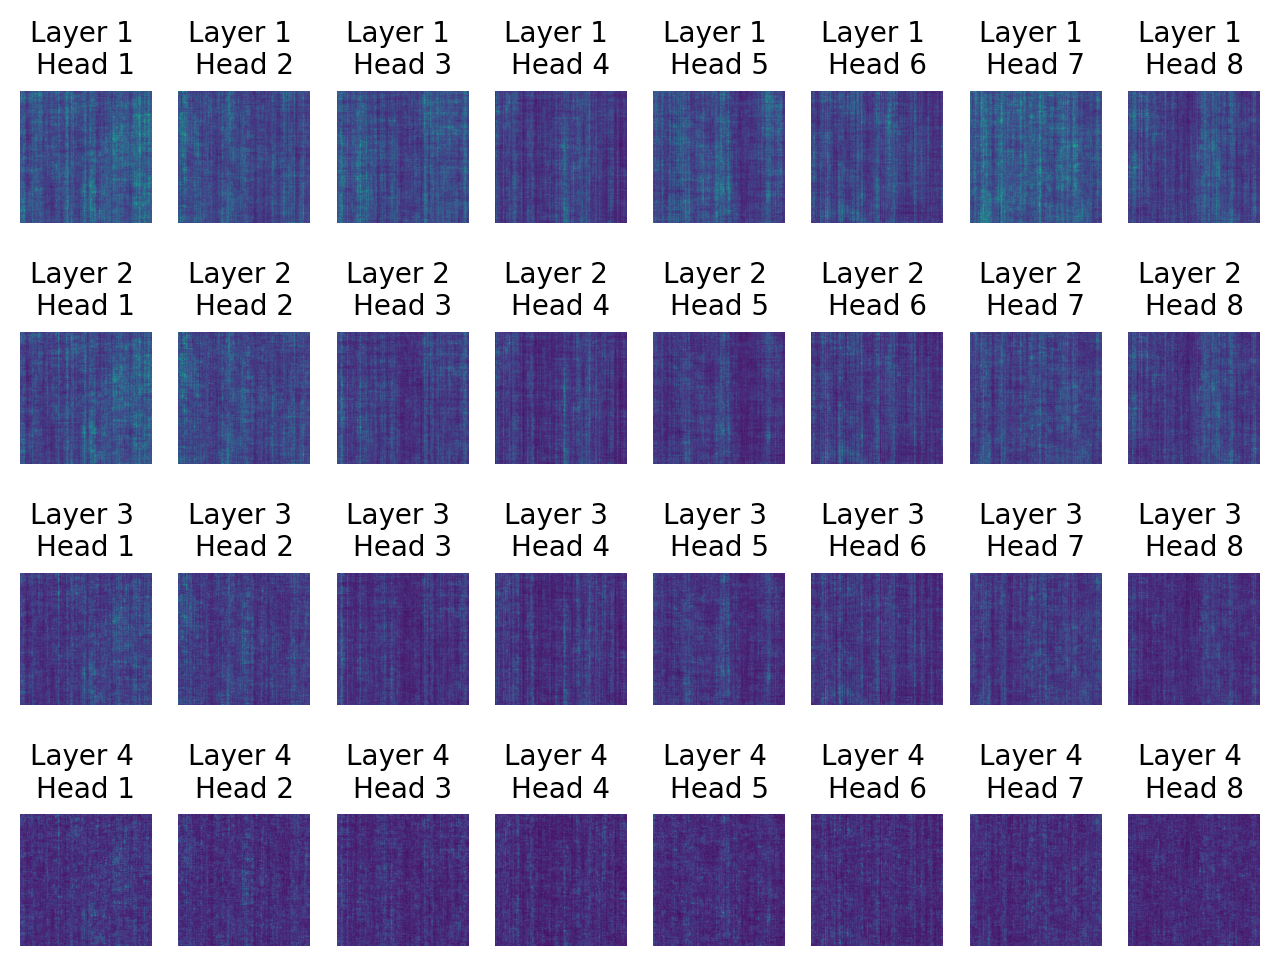

In [5]:
plot_attention_weights(layer_attn_weights.cpu().detach().numpy(), 1)